<a href="https://colab.research.google.com/github/sayedanwar2000/Fake-news-detector/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import re
import string
import itertools
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix 

# load and prepossessing Data for Machine Learning

**Read the data**

In [2]:
data_news=pd.read_csv('/content/news.csv')
data_fake = pd.read_csv("/content/Fake.csv")
data_real = pd.read_csv("/content/True.csv")

**addition label to data_fake & data_real**

In [3]:
data_fake["label"] = 'FAKE'
data_real["label"] = 'REAL'

In [4]:
data_fake.shape

(23481, 5)

**Removing last 10 rows for manual testing**

In [5]:
df_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i], axis = 0, inplace = True)
    
    
df_real_manual_testing = data_real.tail(10)
for i in range(21416,21406,-1):
    data_real.drop([i], axis = 0, inplace = True)

**addition label to df_fake_manual_testing & df_real_manual_testing**

In [6]:
df_fake_manual_testing["label"] = 'FAKE'
df_real_manual_testing["label"] = 'REAL'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**merging df_fake_manual_testing and df_real_manual_testing**

In [7]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_real_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

**merging data_fake and data_real**

In [8]:
data_merge = pd.concat([data_fake, data_real], axis =0 )

**Watching classes**

In [9]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [10]:
data_news.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

**Delete classes is not important**

In [11]:
data_merge = data_merge.drop(["title", "subject","date"], axis = 1)
data_news = data_news.drop(["Unnamed: 0", "title",], axis = 1)

**Watching classes**

In [12]:
data_merge.columns

Index(['text', 'label'], dtype='object')

In [13]:
data_news.columns

Index(['text', 'label'], dtype='object')

**merging data_merge and data_news**

In [14]:
data= pd.concat([data_merge, data_news], axis =0 )

**Split X & Y**

In [15]:
X = data.text
y = data.label

**Creating a function to process the texts**

In [16]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

**Change type to string and process the texts**

In [17]:
X = X.astype('str') 
X = X.apply(wordopt)

**Split the dataset**

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=7)

**Initialize a TfidfVectorizer**

In [19]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

**Fit and transform train set, transform test set**

In [20]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)



```
# Initialize a Models
```


**We using 5 Models**
***
- Passive Aggressive Classifier
- Logistic Regression
- Decision Tree Classification
- Gradient Boosting Classifier
- Random Forest Classifier

# Passive Aggressive Classifier

**Initialize a Model**

In [21]:
PAC=PassiveAggressiveClassifier(max_iter=50)
PAC.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

**Predict on the test set and calculate accuracy**

In [22]:
pred_pac = PAC.predict(tfidf_test)
score_pac = accuracy_score(y_test,pred_pac)
print(f'Passive Aggressive Classifier Accuracy: {round(score_pac*100,2)}%')

Passive Aggressive Classifier Accuracy: 97.38%


**Build confusion matrix**

In [23]:
confusion_matrix(y_test,pred_pac, labels=['FAKE','REAL'])

array([[5250,  108],
       [ 160, 4725]])

**Print Report**

In [24]:
print('# Report Passive Aggressive Classifier #\n')
print(classification_report(y_test, pred_pac))

# Report Passive Aggressive Classifier #

              precision    recall  f1-score   support

        FAKE       0.97      0.98      0.98      5358
        REAL       0.98      0.97      0.97      4885

    accuracy                           0.97     10243
   macro avg       0.97      0.97      0.97     10243
weighted avg       0.97      0.97      0.97     10243



# Logistic Regression

**Initialize a Model**

In [25]:
LR = LogisticRegression()
LR.fit(tfidf_train,y_train)

LogisticRegression()

**Predict on the test set and calculate accuracy**

In [26]:
pred_lr = LR.predict(tfidf_test)
score_lr = LR.score(tfidf_test, y_test)
print(f'Logistic Regression Accuracy: {round(score_lr*100,2)}%')

Logistic Regression Accuracy: 96.21%


Build confusion matrix

In [27]:
confusion_matrix(y_test,pred_lr, labels=['FAKE','REAL'])

array([[5223,  135],
       [ 253, 4632]])

**Print Report**

In [28]:
print('# Report Logistic Regression #\n')
print(classification_report(y_test, pred_lr))

# Report Logistic Regression #

              precision    recall  f1-score   support

        FAKE       0.95      0.97      0.96      5358
        REAL       0.97      0.95      0.96      4885

    accuracy                           0.96     10243
   macro avg       0.96      0.96      0.96     10243
weighted avg       0.96      0.96      0.96     10243



# Decision Tree Classification

**Initialize a Model**

In [29]:
DT = DecisionTreeClassifier()
DT.fit(tfidf_train, y_train)

DecisionTreeClassifier()

**Predict on the test set and calculate accuracy**

In [30]:
pred_dt = DT.predict(tfidf_test)
score_dt = DT.score(tfidf_test, y_test)
print(f'Decision Tree Classification Accuracy: {round(score_dt*100,2)}%')

Decision Tree Classification Accuracy: 94.97%


**Build confusion matrix**

In [31]:
confusion_matrix(y_test,pred_dt, labels=['FAKE','REAL'])

array([[5140,  218],
       [ 297, 4588]])

**Print Report**

In [32]:
print('# Report Decision Tree Classification #\n')
print(classification_report(y_test, pred_dt))

# Report Decision Tree Classification #

              precision    recall  f1-score   support

        FAKE       0.95      0.96      0.95      5358
        REAL       0.95      0.94      0.95      4885

    accuracy                           0.95     10243
   macro avg       0.95      0.95      0.95     10243
weighted avg       0.95      0.95      0.95     10243



# Gradient Boosting Classifier

**Initialize a Model**

In [33]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(tfidf_train, y_train)

GradientBoostingClassifier(random_state=0)

**Predict on the test set and calculate accuracy**

In [34]:
pred_gbc = GBC.predict(tfidf_test)
score_gbc = GBC.score(tfidf_test, y_test)
print(f'Gradient Boosting Classifier Accuracy: {round(score_gbc*100,2)}%')

Gradient Boosting Classifier Accuracy: 95.27%


**Build confusion matrix**

In [35]:
confusion_matrix(y_test,pred_gbc, labels=['FAKE','REAL'])

array([[5273,   85],
       [ 399, 4486]])

**Print Report**

In [36]:
print('# Report Gradient Boosting Classifier #\n')
print(classification_report(y_test, pred_gbc))

# Report Gradient Boosting Classifier #

              precision    recall  f1-score   support

        FAKE       0.93      0.98      0.96      5358
        REAL       0.98      0.92      0.95      4885

    accuracy                           0.95     10243
   macro avg       0.96      0.95      0.95     10243
weighted avg       0.95      0.95      0.95     10243



# Random Forest Classifier

**Initialize a Model**

In [37]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(tfidf_train, y_train)

RandomForestClassifier(random_state=0)

**Predict on the test set and calculate accuracy**

In [38]:
pred_rfc = RFC.predict(tfidf_test)
score_rfc = RFC.score(tfidf_test, y_test)
print(f'Random Forest Classifier Accuracy: {round(score_gbc*100,2)}%')

Random Forest Classifier Accuracy: 95.27%


**Build confusion matrix**

In [39]:
confusion_matrix(y_test,pred_rfc, labels=['FAKE','REAL'])

array([[5217,  141],
       [ 310, 4575]])

**Print Report**

In [40]:
print('# Report Random Forest Classifier #\n')
print(classification_report(y_test, pred_rfc))

# Report Random Forest Classifier #

              precision    recall  f1-score   support

        FAKE       0.94      0.97      0.96      5358
        REAL       0.97      0.94      0.95      4885

    accuracy                           0.96     10243
   macro avg       0.96      0.96      0.96     10243
weighted avg       0.96      0.96      0.96     10243



# calculate accuracy All Models

In [41]:
#PassiveAggressiveClassifier
score_pac = accuracy_score(y_test,pred_pac)
print(f'Passive Aggressive Classifier Accuracy: {round(score_pac*100,2)}%')
#Logistic Regression
score_lr = LR.score(tfidf_test, y_test)
print(f'Logistic Regression Accuracy: {round(score_lr*100,2)}%')
#Decision Tree Classification
score_dt = DT.score(tfidf_test, y_test)
print(f'Decision Tree Classification Accuracy: {round(score_dt*100,2)}%')
#Gradient Boosting Classifier
score_gbc = GBC.score(tfidf_test, y_test)
print(f'Gradient Boosting Classifier Accuracy: {round(score_gbc*100,2)}%')
#Random Forest Classifier
score_rfc = RFC.score(tfidf_test, y_test)
print(f'Random Forest Classifier Accuracy: {round(score_gbc*100,2)}%')

Passive Aggressive Classifier Accuracy: 97.38%
Logistic Regression Accuracy: 96.21%
Decision Tree Classification Accuracy: 94.97%
Gradient Boosting Classifier Accuracy: 95.27%
Random Forest Classifier Accuracy: 95.27%


# Testing Models

In [42]:
def output_lable(n):
    if n == 'FAKE':
        return "Fake News"
    elif n == 'REAL':
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = tfidf_vectorizer.transform(new_x_test)
    pred_PAC = PAC.predict(new_xv_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nPAC Prediction: {} \nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_PAC[0]),
                                                                                                                                     output_lable(pred_LR[0]),
                                                                                                                                     output_lable(pred_DT[0]), 
                                                                                                                                    output_lable(pred_GBC[0]), 
                                                                                                                                    output_lable(pred_RFC[0])))

In [43]:
news = str(input())
manual_testing(news)

Paul Craig RobertsIn the last years of the 20th century fraud entered US foreign policy in a new way.  On false pretenses Washington dismantled Yugoslavia and Serbia in order to advance an undeclared agenda. In the 21st century this fraud multiplied many times. Afghanistan, Iraq, Somalia, and Libya were destroyed, and Iran and Syria would also have been destroyed if the President of Russia had not prevented it.  Washington is also behind the current destruction of Yemen, and Washington has enabled and financed the Israeli destruction of Palestine.  Additionally, Washington operated militarily within Pakistan without declaring war, murdering many women, children, and village elders under the guise of  combating terrorism.  Washington s war crimes rival those of any country in history.I have documented these crimes in my columns and books (Clarity Press). Anyone who still believes in the purity of Washington s foreign policy is a lost soul  Russia and China now have a strategic alliance 

In [44]:
news = str(input())
manual_testing(news)

MINSK (Reuters) - In the shadow of disused Soviet-era factories in Minsk, a street lined with eclectic bars, art galleries and yoga studios has become a haven from the vigilant eyes of the Belarussian authorities.  This place is like an island,  said Yegor, 21, who works at  popular bar Hooligan.  It s the street of freedom.  The government of President Alexander Lukashenko, who has ruled Belarus for the past 23 years and has boasted that he is  the last and only dictator in Europe  ,has little tolerance for any opposition. A powerful police force and feared state security  keep citizens in check. But police patrols are rare in Oktyabrskaya, partly due to its location on an out-of-the-way peninsula in a bend of the river Svislach. When the first restaurant opened there in 2012, few visitors came but now it ranks among the most fashionable quarters of Minsk.  Such is the growing popularity of that Oktyabrskaya that investors such as Belgazprombank, a subsidiary of state-owned Russian le

# load and prepossessing Data for Deep Learning

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string 
from bs4 import BeautifulSoup

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout

In [46]:
fake_data = data_fake 
real_data = data_real 

In [47]:
#add column 
real_data['target'] = 1
fake_data['target'] = 0 

In [48]:
#Merging the 2 datasets
data = pd.concat([real_data, fake_data], ignore_index=True, sort=False)
data.head()

,title,text,subject,date,label,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,1


In [49]:
data.columns

Index(['title', 'text', 'subject', 'date', 'label', 'target'], dtype='object')

In [50]:
data['text']= data['subject'] + " " + data['title'] + " " + data['text']
del data['title']
del data['subject']
del data['date']
del data['label']
data.head()

,text,target
0,"politicsNews As U.S. budget fight looms, Repub...",1
1,politicsNews U.S. military to accept transgend...,1
2,politicsNews Senior U.S. Republican senator: '...,1
3,politicsNews FBI Russia probe helped by Austra...,1
4,politicsNews Trump wants Postal Service to cha...,1


In [51]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)


#Total function
def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    return text

#Apply function on text column
data['text']=data['text'].apply(cleaning)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], random_state=0)

In [53]:
max_features = 10000
maxlen = 300

In [54]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = tf.keras.preprocessing.sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [55]:
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = tf.keras.preprocessing.sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [56]:
batch_size = 256
epochs = 10
embed_size = 100

In [57]:
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
with tpu_strategy.scope():
  model = Sequential()
  #Non-trainable embeddidng layer
  model.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))
  #LSTM 
  model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
  model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
  model.add(Dense(units = 32 , activation = 'relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [59]:
history = model.fit(X_train, y_train, validation_split=0.3,
                    epochs=25, batch_size=batch_size, shuffle=True, verbose = 1)

Epoch 1/25
93/93 [==============================] - 21s 138ms/step - loss: 0.4639 - accuracy: 0.7684 - val_loss: 0.3281 - val_accuracy: 0.8570
Epoch 2/25
93/93 [==============================] - 11s 120ms/step - loss: 0.3428 - accuracy: 0.8489 - val_loss: 0.3036 - val_accuracy: 0.8692
Epoch 3/25
93/93 [==============================] - 11s 120ms/step - loss: 0.3040 - accuracy: 0.8669 - val_loss: 0.4246 - val_accuracy: 0.8438
Epoch 4/25
93/93 [==============================] - 11s 120ms/step - loss: 0.2771 - accuracy: 0.8853 - val_loss: 0.2372 - val_accuracy: 0.9055
Epoch 5/25
93/93 [==============================] - 11s 120ms/step - loss: 0.3075 - accuracy: 0.8725 - val_loss: 0.2503 - val_accuracy: 0.9182
Epoch 6/25
93/93 [==============================] - 11s 120ms/step - loss: 0.2626 - accuracy: 0.8964 - val_loss: 0.2302 - val_accuracy: 0.9140
Epoch 7/25
93/93 [==============================] - 11s 120ms/step - loss: 0.3563 - accuracy: 0.8478 - val_loss: 0.2230 - val_accuracy: 0.9155

In [60]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

1052/1052 [==============================] - 33s 30ms/step - loss: 0.0236 - accuracy: 0.9922
Accuracy of the model on Training Data is -  99.22157526016235 %
351/351 [==============================] - 11s 31ms/step - loss: 0.0469 - accuracy: 0.9847
Accuracy of the model on Testing Data is -  98.46702218055725 %


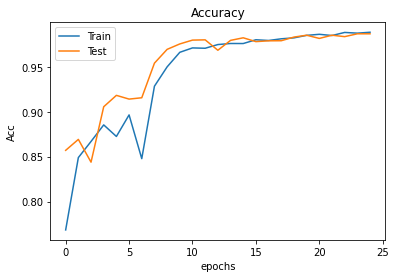

In [61]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

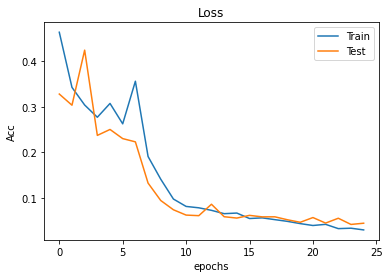

In [62]:


plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()